In [242]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                                                  
warnings.filterwarnings("ignore")

# TASK 1

In [243]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [245]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# TASK 2

In [246]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [247]:
# 1
df['bmi'].corr(df['charges'])

0.1983409688336289

In [248]:
# 2
df['bmi'].corr(df['age'])

0.1092718815485352

In [249]:
#3
df['age'].corr(df['charges'])

0.29900819333064765

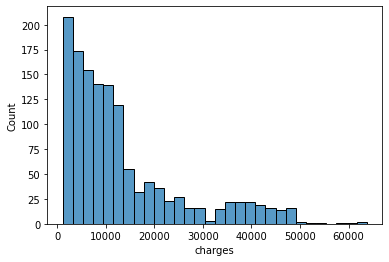

In [250]:
sns.histplot(df['charges'])
plt.show()

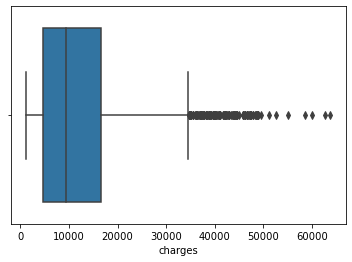

In [251]:
sns.boxplot(df['charges'])
plt.show()

In [252]:
df1=df.copy()

In [253]:
#5 
import numpy as np
ind=np.where(df1['bmi']<18.5)
ind1=np.where((df1['bmi']>=18.5) & (df1['bmi']<=25))
ind2=np.where((df1['bmi']>=25) & (df1['bmi']<=30))
ind3=np.where(df1['bmi']>30)
df1['bmi'].iloc[ind]='underweight'
df1['bmi'].iloc[ind1]='normalweight'
df1['bmi'].iloc[ind2]='overweight'
df1['bmi'].iloc[ind3]='obese'

In [254]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,overweight,0,yes,southwest,16884.92400
1,18,male,obese,1,no,southeast,1725.55230
2,28,male,obese,3,no,southeast,4449.46200
3,33,male,normalweight,0,no,northwest,21984.47061
4,32,male,overweight,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,obese,3,no,northwest,10600.54830
1334,18,female,obese,0,no,northeast,2205.98080
1335,18,female,obese,0,no,southeast,1629.83350
1336,21,female,overweight,0,no,southwest,2007.94500


In [255]:
data=df1.groupby(df1['region'])['bmi'].value_counts().rename('count').reset_index()
data

,region,bmi,count
0,northeast,obese,143
1,northeast,overweight,98
2,northeast,normalweight,73
3,northeast,underweight,10
4,northwest,obese,148
5,northwest,overweight,107
6,northwest,normalweight,63
7,northwest,underweight,7
8,southeast,obese,243
9,southeast,overweight,80


      region           bmi  count
0  northeast         obese    143
1  northeast    overweight     98
2  northeast  normalweight     73
3  northeast   underweight     10


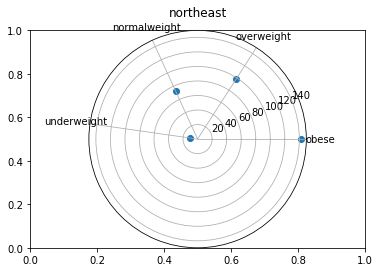

      region           bmi  count
4  northwest         obese    148
5  northwest    overweight    107
6  northwest  normalweight     63
7  northwest   underweight      7


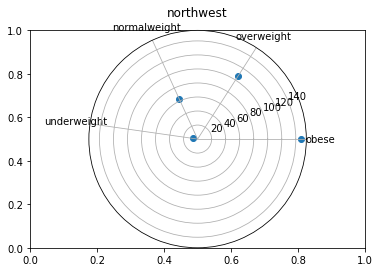

       region           bmi  count
8   southeast         obese    243
9   southeast    overweight     80
10  southeast  normalweight     41


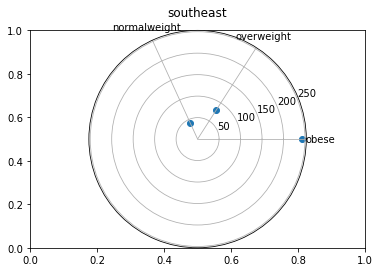

       region           bmi  count
11  southwest         obese    171
12  southwest    overweight    103
13  southwest  normalweight     48
14  southwest   underweight      3


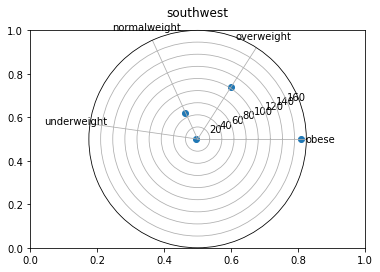

In [256]:
data1=data.groupby(data['region'])
for x in data['region'].unique():
    data2=data1.get_group(x)
    print(data2)
    fig, ax = plt.subplots()
    ax=fig.add_subplot(projection= 'polar')
    ax.scatter(data2['bmi'],data2['count'])
    plt.title(f'{x}')
    plt.show()

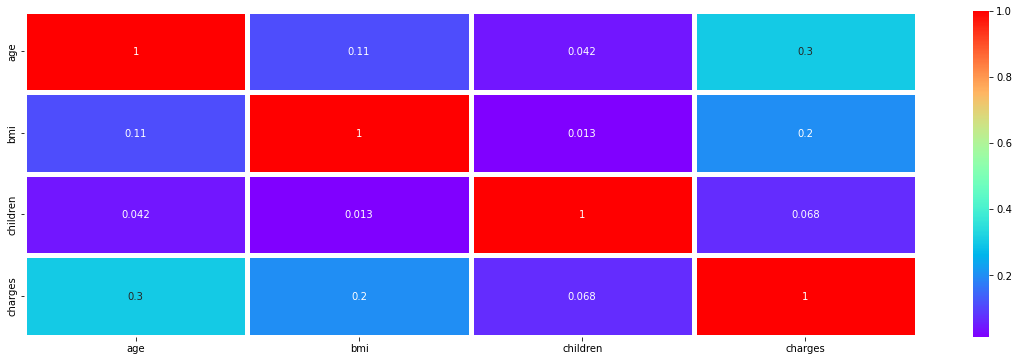

In [257]:
fig,ax=plt.subplots(figsize=(20,6))
sns.heatmap(df.corr(),cmap='rainbow',annot=True,linewidth=5)
plt.show()

# TASK 3

In [258]:
catagory=df[['sex','smoker','region']].copy()
catagory

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [259]:
us_df=df.copy()
us_df.drop(columns=['sex','smoker','region'],inplace=True)
us_df

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [260]:
from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler().fit_transform(us_df)
X=pd.DataFrame(X,columns=us_df.columns)
X

,age,bmi,children,charges
0,0.021739,0.321227,0.0,0.251611
1,0.000000,0.479150,0.2,0.009636
2,0.217391,0.458434,0.6,0.053115
3,0.326087,0.181464,0.0,0.333010
4,0.304348,0.347592,0.0,0.043816
...,...,...,...,...
1333,0.695652,0.403820,0.6,0.151299
1334,0.000000,0.429379,0.0,0.017305
1335,0.000000,0.562012,0.0,0.008108
1336,0.065217,0.264730,0.0,0.014144


no. of cluster: 2 ,distortion: 188.56373395165107 ,silhouette avg: 0.31606232850828336
no. of cluster: 3 ,distortion: 145.4402871589763 ,silhouette avg: 0.32362993071542656
no. of cluster: 4 ,distortion: 122.34746040261118 ,silhouette avg: 0.3375902731990769
no. of cluster: 5 ,distortion: 107.31620165708132 ,silhouette avg: 0.3137564726180407
no. of cluster: 6 ,distortion: 96.36974419754385 ,silhouette avg: 0.276622843235899
no. of cluster: 7 ,distortion: 86.02250691593963 ,silhouette avg: 0.2930173848024671
no. of cluster: 8 ,distortion: 80.21474167973818 ,silhouette avg: 0.26040407284752076
no. of cluster: 9 ,distortion: 75.09918783348992 ,silhouette avg: 0.2641949851887967


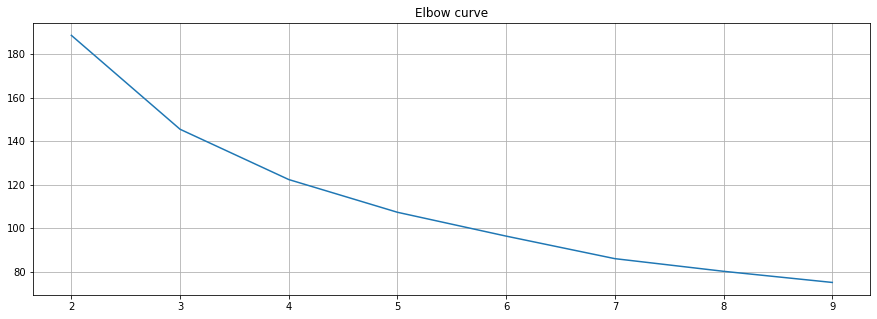

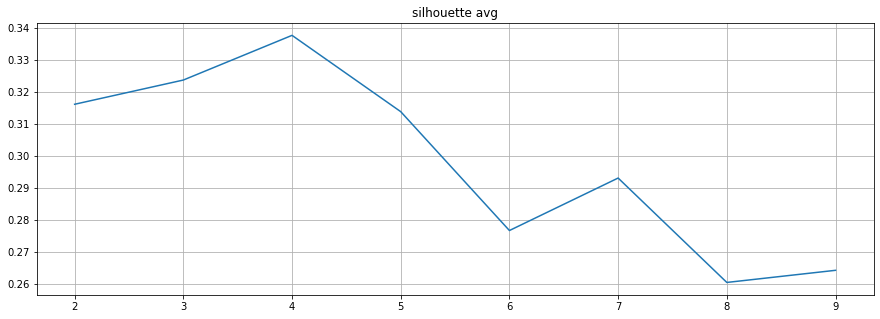

In [261]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
data=[]
dist=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=2)
    cluster=kmeans.fit(X)
    distorion=kmeans.inertia_
    cluster_label=cluster.predict(X)
    silhouette_avg = silhouette_score(X, cluster_label)
    dist.append(distorion)
    data.append(silhouette_avg)
    print('no. of cluster:',k,',distortion:',distorion,',silhouette avg:',silhouette_avg)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), dist)
plt.grid(True)
plt.title('Elbow curve')
plt.show()
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), data)
plt.grid(True)
plt.title('silhouette avg')
plt.show()

In [262]:
temp=pd.DataFrame([data,range(2,10)])
value=temp.T
value.columns=['score','k']
value['k']=value['k'].astype(int)
score=value.sort_values(by='score').iloc[-1,1]
value

,score,k
0,0.316062,2
1,0.323630,3
2,0.337590,4
3,0.313756,5
4,0.276623,6
5,0.293017,7
6,0.260404,8
7,0.264195,9


In [263]:
List=[]
for x in range(len(X.columns)-1):
    for y in range(x+1,len(X.columns)):
        List.append([X.columns[x],X.columns[y]])

In [264]:
List

[['age', 'bmi'],
 ['age', 'children'],
 ['age', 'charges'],
 ['bmi', 'children'],
 ['bmi', 'charges'],
 ['children', 'charges']]

[3 1 1 ... 1 3 0]
Attributes used for cluster model:  ['age', 'bmi']


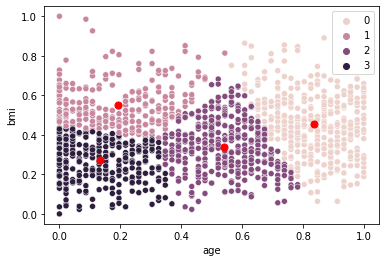

[0 0 3 ... 0 0 2]
Attributes used for cluster model:  ['age', 'children']


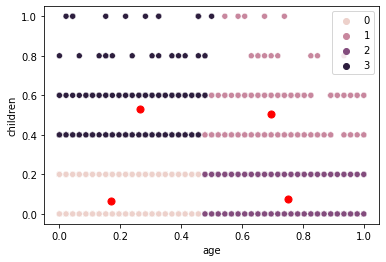

[0 0 0 ... 0 0 1]
Attributes used for cluster model:  ['age', 'charges']


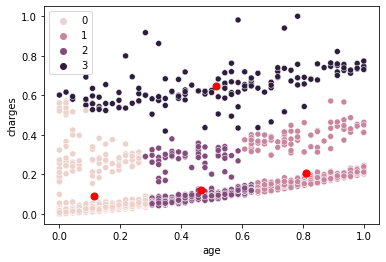

[1 0 3 ... 0 1 1]
Attributes used for cluster model:  ['bmi', 'children']


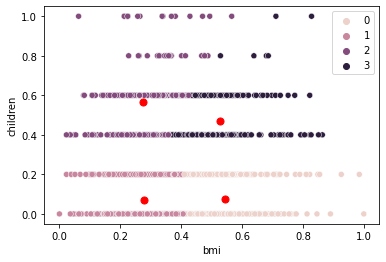

[0 2 2 ... 2 1 0]
Attributes used for cluster model:  ['bmi', 'charges']


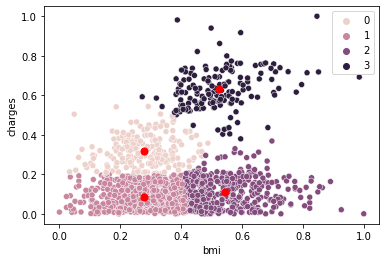

[3 0 1 ... 3 3 2]
Attributes used for cluster model:  ['children', 'charges']


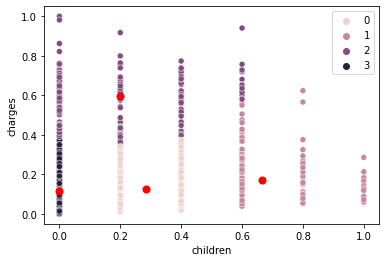

In [265]:
for x in List:
    km  = X[x]
    kmeans = KMeans(n_clusters=score,n_init=score,random_state=2).fit(km)
    centroids = kmeans.cluster_centers_
    cluster=kmeans.predict(km)
    print(cluster)
    catagory[f'{x}']=cluster
#     print(centroids)
    print('Attributes used for cluster model: ', x)
    sns.scatterplot(X[x[0]], X[x[1]], hue= kmeans.labels_)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
    plt.show()

In [266]:
catagory_db=df[['sex','smoker','region']].copy()

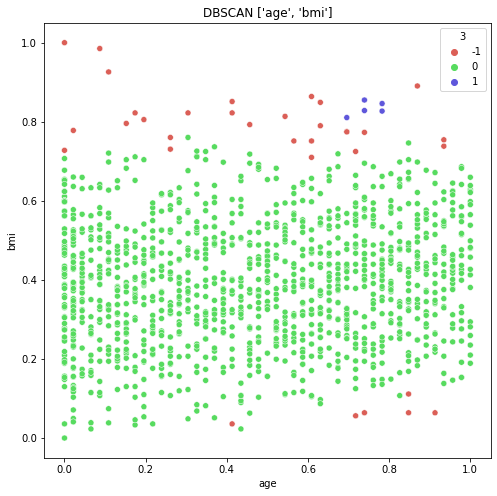

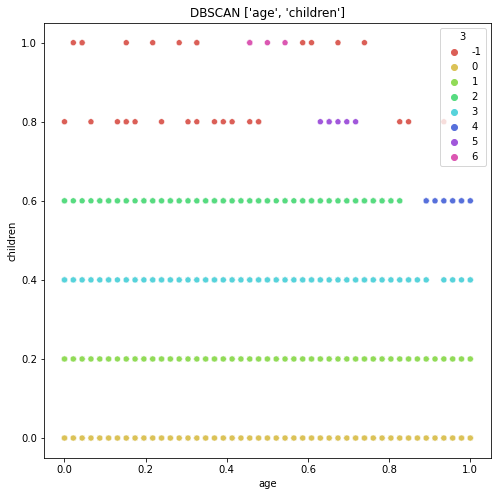

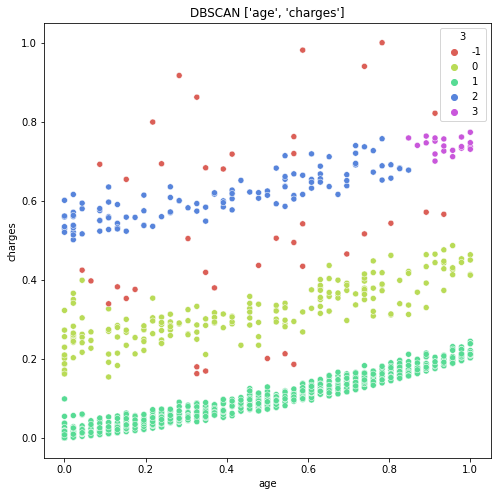

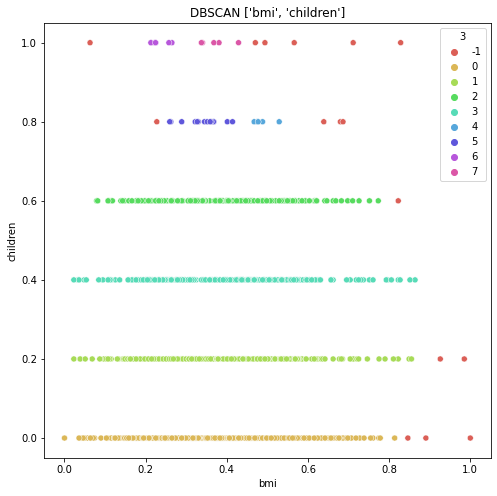

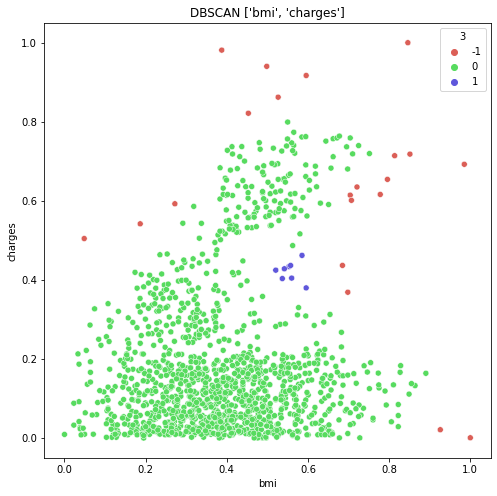

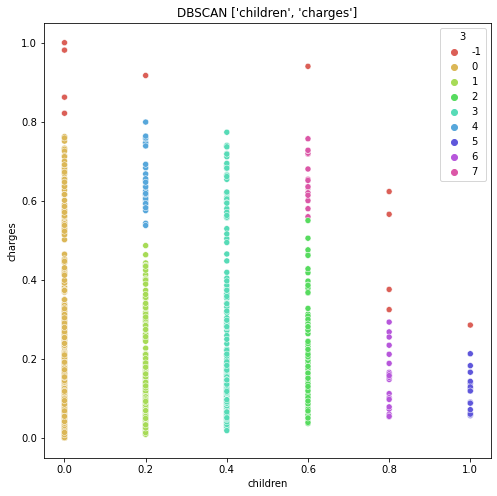

In [267]:
from sklearn.cluster import DBSCAN 
for x in List:
    db  = X[x]
    db1 = DBSCAN(eps=0.05).fit(db)
    catagory_db[f'{y}'] = db1.labels_
    db[f'{y}']=db1.labels_
    plt.figure(figsize=(8, 8))
    sns.scatterplot(db.iloc[:,0], db.iloc[:,1], hue=db[f'{y}'], palette=sns.color_palette('hls', np.unique(db1.labels_).shape[0]))
    plt.title(f'DBSCAN {x}')
    plt.show()

In [268]:
catagory_a=df[['sex','smoker','region']].copy()

n_clusters= 4 linkage = ['children', 'charges']


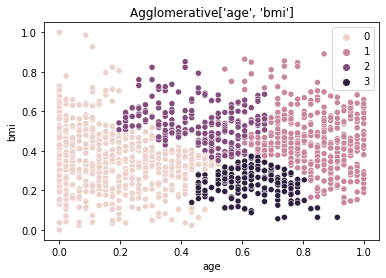

n_clusters= 4 linkage = ['children', 'charges']


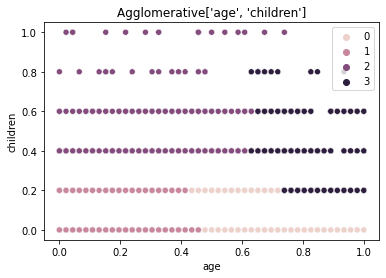

n_clusters= 4 linkage = ['children', 'charges']


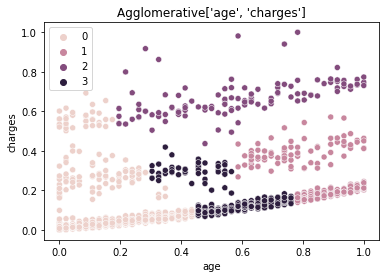

n_clusters= 4 linkage = ['children', 'charges']


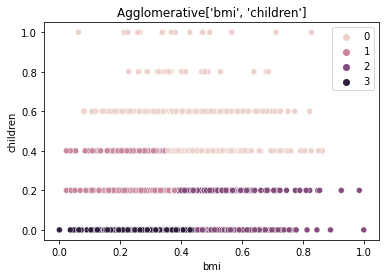

n_clusters= 4 linkage = ['children', 'charges']


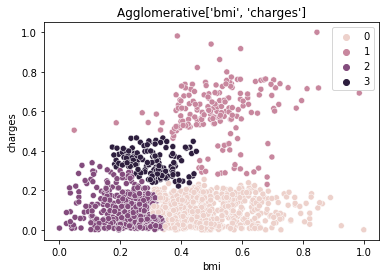

n_clusters= 4 linkage = ['children', 'charges']


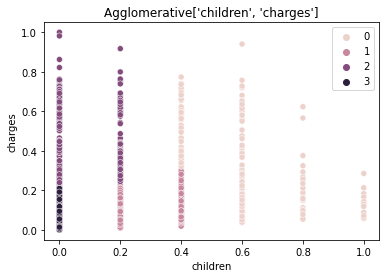

In [269]:
from sklearn.cluster import  AgglomerativeClustering
for z in List:
    A=X[z]
    model = AgglomerativeClustering(n_clusters= score, linkage = 'ward')
    Model = model.fit_predict(A)
    catagory_a[f'{z}']=Model
    A[f'{z}']=Model
    print('n_clusters=',score,'linkage =',x)
    sns.scatterplot(X[z[0]], X[z[1]],hue=model.labels_)
    plt.title(f"Agglomerative{z}")
    plt.show()

Agglomerative Clustering and kmean perform better for [bmi,age],[bmi,charges]                                                                                 
DBSCAN Clustering perform better for [age,charge]                                    
OVER ALL Agglomerative performed better.

# TASK 4

In [270]:
from sklearn.preprocessing import StandardScaler
lr_df=us_df.copy()
X1=StandardScaler().fit_transform(lr_df)
X1=pd.DataFrame(X1,columns=lr_df.columns)
X1

,age,bmi,children,charges
0,-1.438764,-0.453320,-0.908614,0.298584
1,-1.509965,0.509621,-0.078767,-0.953689
2,-0.797954,0.383307,1.580926,-0.728675
3,-0.441948,-1.305531,-0.908614,0.719843
4,-0.513149,-0.292556,-0.908614,-0.776802
...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551
1334,-1.509965,0.206139,-0.908614,-0.914002
1335,-1.509965,1.014878,-0.908614,-0.961596
1336,-1.296362,-0.797813,-0.908614,-0.930362


In [271]:
from sklearn.model_selection import train_test_split
X_data=X1.iloc[:,:-1]
Y_data=X1.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.2,random_state=0)

In [272]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1070, 3), (268, 3), (1070,), (268,))

In [273]:
from sklearn.linear_model import LinearRegression
Model=LinearRegression()
Model.fit(X_train,Y_train)

LinearRegression()

In [274]:
Prediction=Model.predict(X_test)
Prediction

array([ 2.12069764e-01,  1.00552045e-01,  4.49031190e-01,  5.22934577e-01,
       -1.59930387e-01, -3.87694162e-01, -5.57466499e-01,  4.55264591e-01,
        6.63825161e-02, -4.00649391e-02, -2.82572537e-01,  1.32153652e-01,
        4.07452857e-02, -3.33622165e-01, -3.39715740e-01,  2.34473304e-01,
        1.58431171e-01, -2.05121044e-01, -1.15541028e-02, -4.13406191e-01,
        1.15271938e-01,  4.28626988e-01,  1.74155801e-01,  8.08412361e-03,
       -3.00994568e-01,  2.34984964e-02, -5.97595415e-01,  1.71528488e-01,
       -3.34832379e-01,  1.46368645e-01,  6.53760911e-02,  6.09020126e-01,
        5.17012913e-01,  3.87044451e-01, -5.90902993e-01, -2.99109230e-01,
        3.53613802e-01, -7.23902264e-02,  1.11448131e-01, -3.49000502e-01,
       -3.88700587e-01, -3.17078012e-01, -1.72610125e-01,  5.42270077e-01,
       -2.97996545e-01, -2.36978092e-01,  2.26345627e-01, -6.57659255e-02,
       -3.91976990e-01,  1.49950732e-01, -2.55810380e-01, -3.35858785e-01,
        8.50249435e-02,  

In [275]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Prediction,Y_test)

0.9088804339559977

In [276]:
Model.score(X_test,Prediction)

1.0

In [277]:
Model.score(X_test,Y_test)

0.16301209866339916

In [278]:
lr1_df=df.copy()
lr1_df.drop(columns=['sex','smoker','region','charges'],inplace=True)
lr1_df

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [279]:
X2=MinMaxScaler().fit_transform(lr1_df)
X2=pd.DataFrame(X1,columns=lr1_df.columns)
X2

,age,bmi,children
0,-1.438764,-0.453320,-0.908614
1,-1.509965,0.509621,-0.078767
2,-0.797954,0.383307,1.580926
3,-0.441948,-1.305531,-0.908614
4,-0.513149,-0.292556,-0.908614
...,...,...,...
1333,0.768473,0.050297,1.580926
1334,-1.509965,0.206139,-0.908614
1335,-1.509965,1.014878,-0.908614
1336,-1.296362,-0.797813,-0.908614


In [280]:
X2['smoker'] = df['smoker'] == 'yes'
X2['charges']=df['charges']
X2.astype(float).head()

,age,bmi,children,smoker,charges
0,-1.438764,-0.453320,-0.908614,1.0,16884.92400
1,-1.509965,0.509621,-0.078767,0.0,1725.55230
2,-0.797954,0.383307,1.580926,0.0,4449.46200
3,-0.441948,-1.305531,-0.908614,0.0,21984.47061
4,-0.513149,-0.292556,-0.908614,0.0,3866.85520


In [281]:
X1_data=X2.drop(columns='charges',axis=1)
Y1_data=X2.iloc[:,-1]
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1_data,Y1_data,test_size=0.2,random_state=0)

In [282]:
X1_train.shape,X1_test.shape,Y1_train.shape,Y1_test.shape

((1070, 4), (268, 4), (1070,), (268,))

In [283]:
model=LinearRegression()
model.fit(X1_train,Y1_train)

LinearRegression()

In [284]:
Prediction1=model.predict(X1_test)
Prediction1

array([11461.21778356,  9920.2467051 , 37782.65091804, 15948.07879991,
        6880.17953405,  3611.72298504,  1116.03761213, 14050.36635496,
        8755.91494642,  7245.24400051,  4141.88989561, 10105.75686073,
        9070.28895257,  4297.76835129, 27698.89042419, 11158.3034547 ,
       11185.20391622,  5566.17742364,  8020.78118255, 26614.64277528,
       33491.40334294, 14072.29016492, 11247.08992767, 32583.50484706,
        4526.13824173,  8649.40532691,   772.16553719, 10160.3849297 ,
        4246.31063366, 10201.54588088,  8778.51695222, 40341.14720167,
       15888.84361834, 14071.98150805, 24375.43626726,  4693.49482979,
       12917.26831998, 30917.29783745, 33245.25708334,  3865.50438555,
        3634.32499084,  4441.72956167, 30088.45417165, 39174.930838  ,
       28081.31611876,  4782.78344047, 11052.499178  ,  7665.89830648,
        3205.13568791, 10741.82476894,  5132.18752728,  3180.44587201,
       33323.52723342, 37851.13513126, 16314.94956658,  6589.79766046,
      

In [285]:
mean_squared_error(Prediction1,Y1_test)

32171708.572455727

In [286]:
model.score(X1_test,Prediction1)

1.0

In [287]:
model.score(X1_test,Y1_test)

0.7978274606303823

# PART 5

In [288]:
from sklearn.tree import DecisionTreeRegressor
dtm = DecisionTreeRegressor(max_depth=3,min_samples_split=5,max_leaf_nodes=10)
dtm.fit(X1_train,Y1_train)
dtm.score(X1_test,Y1_test)

0.882017038339453

In [289]:
final=dtm.predict(X1_test)
final

array([13786.3491426 , 10411.87674567, 45656.34257404, 13786.3491426 ,
       10411.87674567,  6323.09632027,  3299.44152185, 10411.87674567,
        6323.09632027,  6323.09632027,  6323.09632027, 10411.87674567,
       10411.87674567,  6323.09632027, 18554.73468484, 10411.87674567,
       13786.3491426 ,  6323.09632027,  6323.09632027, 38491.38993547,
       25285.73773614, 13786.3491426 , 13786.3491426 , 25285.73773614,
        3299.44152185,  6323.09632027,  6323.09632027,  6323.09632027,
        6323.09632027, 10411.87674567,  6323.09632027, 45656.34257404,
       13786.3491426 , 13786.3491426 , 18554.73468484,  6323.09632027,
       10411.87674567, 38491.38993547, 38491.38993547,  3299.44152185,
        6323.09632027,  6323.09632027, 18554.73468484, 45656.34257404,
       38491.38993547,  3299.44152185, 10411.87674567,  6323.09632027,
        6323.09632027, 13786.3491426 ,  6323.09632027,  3299.44152185,
       25285.73773614, 45656.34257404, 13786.3491426 ,  6323.09632027,
      

In [290]:
list(X1_test.index)

[578,
 610,
 569,
 1034,
 198,
 981,
 31,
 1256,
 1219,
 1320,
 613,
 1107,
 1263,
 406,
 795,
 970,
 824,
 141,
 1173,
 1042,
 966,
 467,
 1098,
 757,
 1097,
 319,
 1286,
 459,
 5,
 517,
 54,
 1062,
 722,
 45,
 989,
 1032,
 1121,
 34,
 667,
 1268,
 863,
 108,
 638,
 55,
 161,
 1019,
 159,
 1310,
 1220,
 661,
 1178,
 1195,
 52,
 883,
 227,
 546,
 974,
 744,
 1272,
 717,
 487,
 1301,
 435,
 1144,
 390,
 483,
 503,
 298,
 364,
 211,
 918,
 1061,
 1252,
 997,
 202,
 342,
 204,
 184,
 1208,
 1284,
 333,
 549,
 1202,
 268,
 958,
 142,
 656,
 1235,
 233,
 19,
 152,
 1126,
 554,
 1234,
 988,
 662,
 381,
 953,
 1190,
 18,
 479,
 834,
 303,
 53,
 641,
 1054,
 1089,
 47,
 308,
 1146,
 486,
 796,
 299,
 911,
 530,
 686,
 1295,
 310,
 1209,
 1293,
 312,
 1133,
 768,
 758,
 913,
 431,
 818,
 85,
 39,
 787,
 823,
 1,
 589,
 512,
 461,
 322,
 224,
 711,
 58,
 881,
 1147,
 1055,
 481,
 317,
 320,
 801,
 443,
 1157,
 747,
 980,
 426,
 14,
 1203,
 1283,
 960,
 669,
 506,
 270,
 1135,
 124,
 906,
 944,
 

In [291]:
catagory_dt=df[['sex','smoker','region']].iloc[list(X1_test.index)]
catagory_dt['predict']=final
catagory_dt

,sex,smoker,region,predict
578,male,no,southwest,13786.349143
610,female,no,southeast,10411.876746
569,male,yes,northwest,45656.342574
1034,male,no,northwest,13786.349143
198,female,no,northwest,10411.876746
...,...,...,...,...
1084,female,no,northwest,13786.349143
726,male,no,northwest,6323.096320
1132,male,no,northeast,13786.349143
725,female,yes,southeast,38491.389935


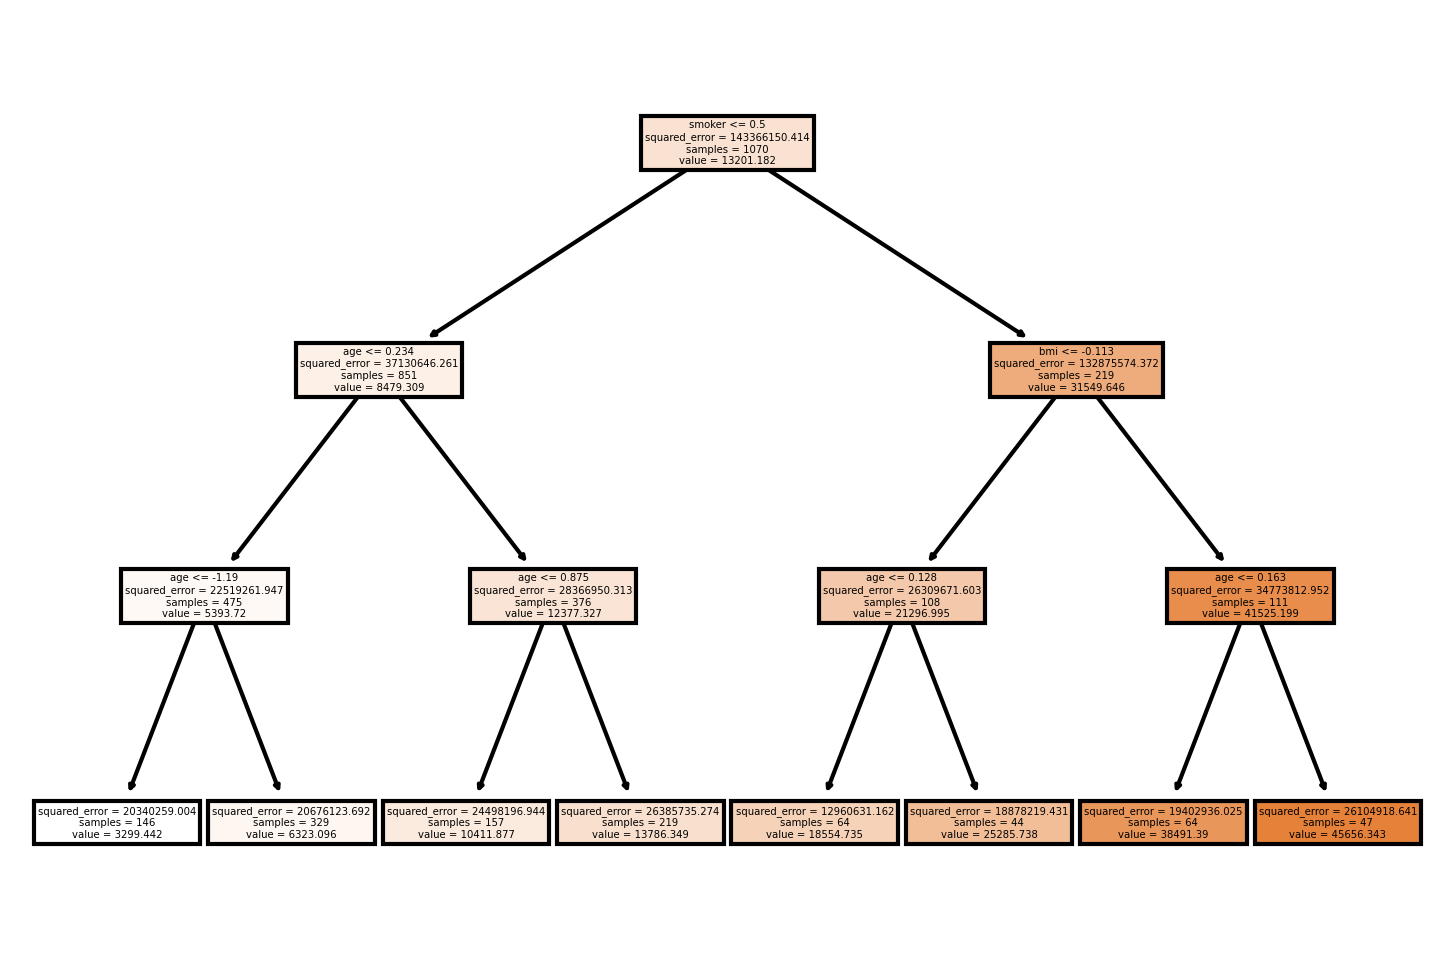

In [292]:
from sklearn import tree
fig,ax= plt.subplots(dpi=300)
tree.plot_tree(dtm,feature_names = X1_train.columns, filled = True)
plt.show()

In [301]:
new=us_df.iloc[:,:-1]
new['smoker'] = df['smoker'] == 'yes'
new['charges'] = df['charges']
new.astype(float).head()

,age,bmi,children,smoker,charges
0,19.0,27.900,0.0,1.0,16884.92400
1,18.0,33.770,1.0,0.0,1725.55230
2,28.0,33.000,3.0,0.0,4449.46200
3,33.0,22.705,0.0,0.0,21984.47061
4,32.0,28.880,0.0,0.0,3866.85520


In [304]:
X2_data=new.drop(columns='charges',axis=1)
Y2_data=new.iloc[:,-1]
X2_train,X2_test,Y2_train,Y2_test=train_test_split(X2_data,Y2_data,test_size=0.2,random_state=0)

In [305]:
dtm2 = DecisionTreeRegressor(max_depth=3,min_samples_split=5,max_leaf_nodes=10)
dtm2.fit(X2_train,Y2_train)
dtm2.score(X2_test,Y2_test)

0.882017038339453

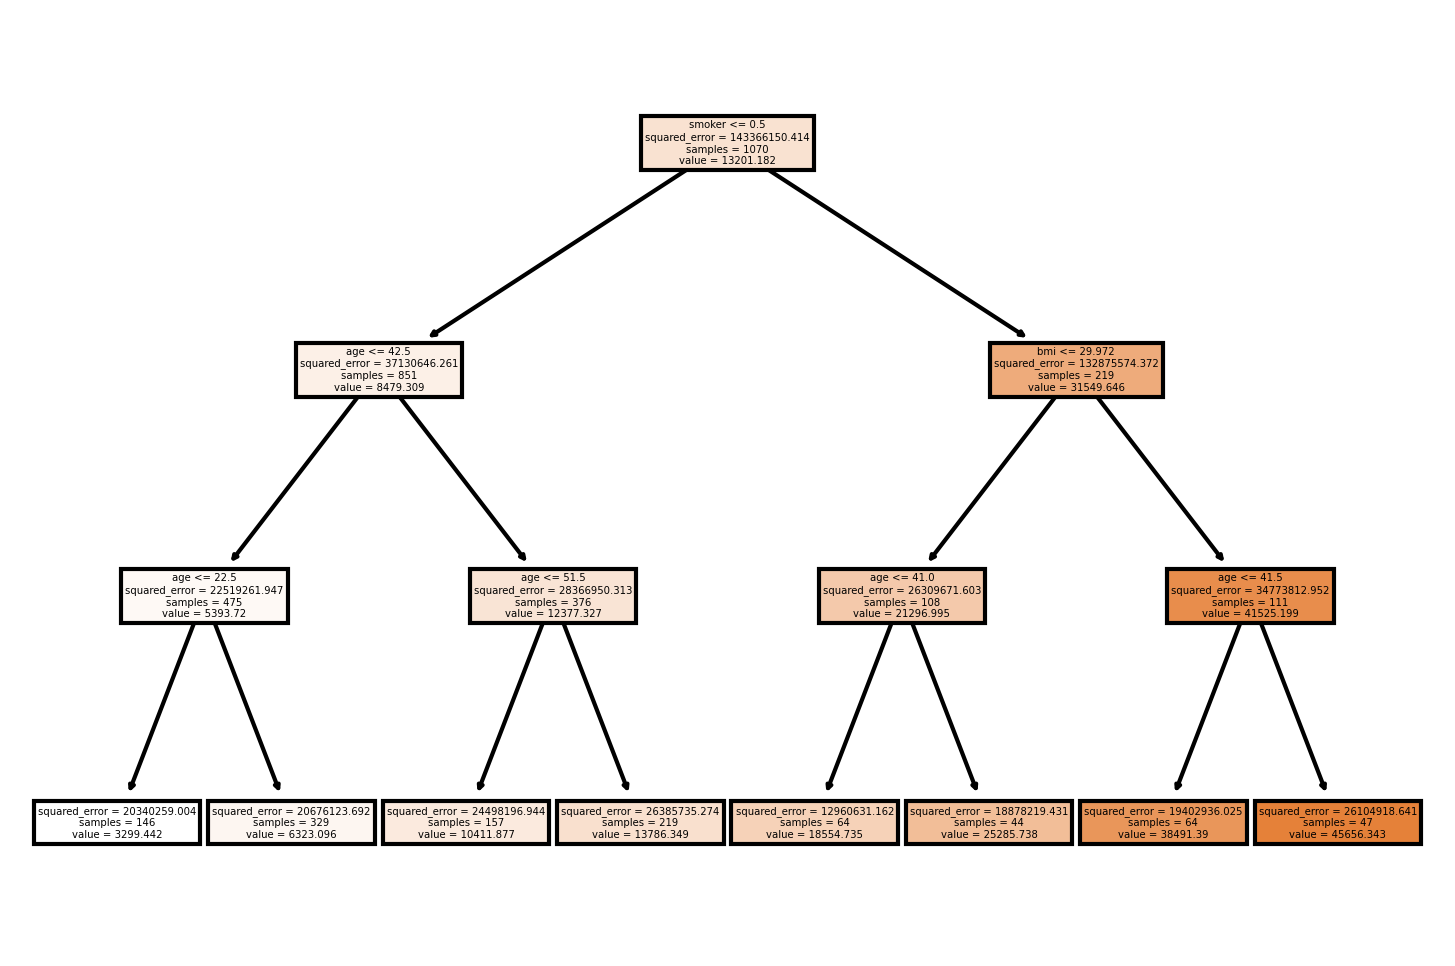

In [307]:
from sklearn import tree
fig,ax= plt.subplots(dpi=300)
tree.plot_tree(dtm2,feature_names = X2_train.columns, filled = True)
plt.show()

client age <= 22.5 ,value 3299.5 to 6323 non smoker                                                                   
client age <= 51.5 ,value 10411.8 to 13786.3 non smoker                                                               
client age <= 41 ,value 18554.7 to 25285.7 bmi <= 30  smoker                                                          
client age <= 22.5 ,value 38491.5 to 45656.3 bmi > 30 smoker                                                         

In [308]:
catagory

,sex,smoker,region,"['age', 'bmi']","['age', 'children']","['age', 'charges']","['bmi', 'children']","['bmi', 'charges']","['children', 'charges']"
0,female,yes,southwest,3,0,0,1,0,3
1,male,no,southeast,1,0,0,0,2,0
2,male,no,southeast,1,3,0,3,2,1
3,male,no,northwest,3,0,2,1,0,3
4,male,no,northwest,3,0,2,1,1,3
...,...,...,...,...,...,...,...,...,...
1333,male,no,northwest,0,1,1,2,1,1
1334,female,no,northeast,3,0,0,0,2,3
1335,female,no,southeast,1,0,0,0,2,3
1336,female,no,southwest,3,0,0,1,1,3
